## Dataset Exploration

In [0]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
#!wget http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip


In [0]:
#!unzip CheXpert-v1.0-small.zip

In [0]:
#!ls CheXpert-v1.0-small

In [0]:

data_labels = pd.read_csv('./CheXpert-v1.0-small/valid.csv')  
data_labels

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


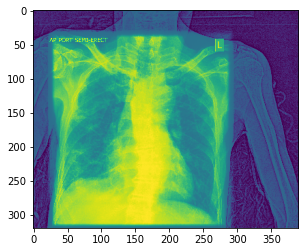

Path                          CheXpert-v1.0-small/valid/patient64543/study1/...
Sex                                                                        Male
Age                                                                          85
Frontal/Lateral                                                         Frontal
AP/PA                                                                        AP
No Finding                                                                    0
Enlarged Cardiomediastinum                                                    1
Cardiomegaly                                                                  0
Lung Opacity                                                                  1
Lung Lesion                                                                   0
Edema                                                                         1
Consolidation                                                                 0
Pneumonia                               

In [0]:
path = data_labels["Path"].iloc[3]
labels = validation_meta.iloc[3]


img=mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()
labels

In [0]:
def get_patient_id (row):
  patient_folder = re.findall(r"patient[0-9]+", row["Path"])
  if len(patient_folder) > 0:
    patient_number = re.findall(r"[0-9]+", patient_folder[0])
  if len(patient_number) > 0:
    return patient_number[0]

In [0]:
data_labels["patient_id"] = data_labels.apply(get_patient_id, axis = 1)

In [0]:
samples_byPatient = data_labels.groupby("patient_id")
patient_ids = pd.Series(list(samples_byPatient.groups.keys()))

In [0]:
train_size = 140
test_size = 40
valid_size = 20

train_patients = patient_ids.sample(n=train_size)
test_patients = patient_ids[~patient_ids.isin(train_patients)].sample(n=test_size)
valid_patients = patient_ids[~((patient_ids.isin(train_patients))|(patient_ids.isin(test_patients)))].sample(n=valid_size)

train_labels = data_labels[data_labels["patient_id"].isin(train_patients)]
test_labels = data_labels[data_labels["patient_id"].isin(test_patients)]
valid_labels = data_labels[data_labels["patient_id"].isin(valid_patients)]

print("{patients} patients and {total} total samples in training set".format(patients=len(train_patients), total=len(train_labels)))
print("{patients} patients and {total} total samples in test set".format(patients=len(test_patients), total=len(test_labels)))
print("{patients} patients and {total} total samples in valid set".format(patients=len(valid_patients), total=len(valid_labels)))

140 patients and 161 total samples in training set
40 patients and 50 total samples in test set
20 patients and 23 total samples in valid set


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,patient_id
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64541
5,CheXpert-v1.0-small/valid/patient64545/study1/...,Female,55,Frontal,AP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,64545
6,CheXpert-v1.0-small/valid/patient64546/study1/...,Male,56,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,64546
7,CheXpert-v1.0-small/valid/patient64547/study1/...,Male,59,Frontal,PA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64547
8,CheXpert-v1.0-small/valid/patient64547/study1/...,Male,59,Frontal,PA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CheXpert-v1.0-small/valid/patient64735/study1/...,Female,63,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64735
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64736
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64738
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64739
